In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/gojek_review_sentiment.csv')
df

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive
...,...,...
1777,Jelas lebih baik daripada yang lain di luar sa...,positive
1778,"Untuk ruang penyimpanan yang luas, buatlah sed...",negative
1779,"Aplikasi yang sangat bagus, beri kami lebih ba...",positive
1780,cintai ini terutama ketika Anda membutuhkan tr...,positive


In [5]:
df.shape

(1782, 2)

In [7]:
df = df.drop_duplicates(subset = 'review')

In [9]:
df.duplicated().sum()

0

In [11]:
df = df.dropna()

In [13]:
df.isnull().sum()

review    0
rate      0
dtype: int64

In [15]:
df.shape

(1780, 2)

In [17]:
import re
def clean_twitter_text(review):
    #menghapus karakter khusus seperti @mentions, #hashtags, dan URL
    text = re.sub(r'@[A-Za-z0-9_]+', '', review)
    text = re.sub(r'#\w+', '', review)
    text = re.sub(r'RT[\s]+', '', review)
    text = re.sub(r'https?://\S+', '', review)

    text = re.sub(r'[^A-Za-z0-9 ]', '', review)
    text = re.sub(r'\s+', ' ', review).strip()

    return review

df['review'] = df['review'].apply(clean_twitter_text)

In [19]:
#Normalisasi
norm ={' muter ':' putar ', ' gk ':' tidak', ' profisional ' : ' profesional', ' skrng ' : ' sekarang ', ' uwang ':' uang ' ,'tiktokan ':'tiktok', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum ',
        ' dgn ' : ' dengan ', ' seller ': ' penjual ',' service ':' pelayanan ', ' tp ':' tapi ', ' recommended ':' rekomendasi ', ' kren ':' keren ', ' kereen ':' keren ', ' mantab ': ' keren ',' matching ':' sesuai ','happy':' senang ','original': 'asli ','ori':'asli ', "trusted" : "terpercaya", "angjaaaassss":"keren", " gue ": " saya ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', 'mantaaap':'bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus ', " dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', 
' blum ':' belum ', "quality":"kualitas", 'baguss':'bagus', 'overall' : 'akhirnya', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', 
 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' real ': ' asli ', ' bnb ': ' baru ' ,
' recommended':' rekomen ', 'recomend':' rekomen ', 'good':'bagus',
'eksis ':'ada ', 'beenilai ':'bernilai ', ' dg ':' dengan ', ' ori ':' asli ', ' setting ':' atur ', " free ":" gratis ",
' yg ':' yang ', 't4 ':'tempat', ' awat ':' awet', ' mantep ':' bagus ', 'mantapp':'bagus', 
'kl ':'kalo', ' k ':' ke ', 'plg ':'pulang ', 'ajah ':'aja ', 'bgt':'banget', 'lbh ':'lebih', 'ayem':'tenang','dsana ':'disana ', 'lg':' lagi',
'pas ':'saat ', ' bnib ': ' baru ', 
' nggak ':' tidak ', 'karna ':'karena ', 'utk ':'untuk ',
' dn ':' dan ', ' mlht ':' melihat ', ' pd ':' pada ', 'mndngr ':'mendengar ', 'crita':'cerita', ' dpt ':' dapat ', ' mksh ':' terima kasih ', ' sellerrrr':' penjual', 'ori ':'asli ', ' new ':' baru ',
'sejrh':'sejarah', 'mnmbh ':'menambah ', 'sayapun':'saya', 'thn ':'tahun ', 'good':'bagus', ' awettt':' awet',
'halu ':'halusinasi ', ' nyantai ':' santai ', 'plus ':'dan ',
' ayang ':' sayang ', ' Rekomendded ':' direkomendasikan ', ' now ': ' sekarang ', 'slalu ':'selalu ', 'photo ': 'foto ', 'slah ':'salah ', 'krn':'karena', ' ga ':' tidak ', 'ok ':'oke ', ' meski':' mesti', ' para ':'parah', ' nawarin':' menawari', 'socmed':'sosial media',
' sya ':' saya ', 'siip':'bagus', ' bny ':' banyak ', ' tdk ':' tidak ', ' byk ':' banyak ', 
' pool ':' sekali ', " pgn ":" ingin ", " gue ":" saya ", " bgmn ":" bagaimana ", " ga ":" tidak ", 
' gak ':' tidak ', ' dr ':' dari ', ' yg ':' yang ', ' lu ':' kamu ', ' sya ':' saya ', 
' lancarrr ':' lancar ', ' kayak ':' seperti ', ' ngawur ':' sembarangan ', ' k ':' ke ', 
' luasss ':' luas ', ' sy ':' saya ', ' thn ':' tahun ', ' males ':' malas ',
' tgl ':' tanggal ', ' lg ':' lagi ',' bs ':' bisa ', ' bgtt ':' banget ',' gua ':' saya ', ' exp ':' ekspedisi ', 'exp ':'ekspedisi ', ' mantep ':' mantap ', ' bangettt ':' sangat ', ' ndak ':' tidak ', ' dluan ':' duluan ', ' packing ':' kemasan ', ' kliatan ':' kelihatan ', ' dgn ':' dengan'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['review'] = df['review'].apply(lambda x: normalisasi(x))
df

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive
...,...,...
1777,Jelas lebih baik daripada yang lain di luar sa...,positive
1778,"Untuk ruang penyimpanan yang luas, buatlah sed...",negative
1779,"Aplikasi yang sangat bagus, beri kami lebih ba...",positive
1780,cintai ini terutama ketika Anda membutuhkan tr...,positive


In [21]:
!pip install Sastrawi

In [23]:
#stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['review'] = df['review'].apply(lambda x: stopword(x))

In [90]:
#Tokenisasi
from nltk.tokenize import word_tokenize

df['Tokens'] = df['review'].apply(word_tokenize)

In [32]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokenizer(review):
    return [stemmer.stem(word) for word in review]

df['Tokens'] = df['Tokens'].apply(stem_tokenizer)

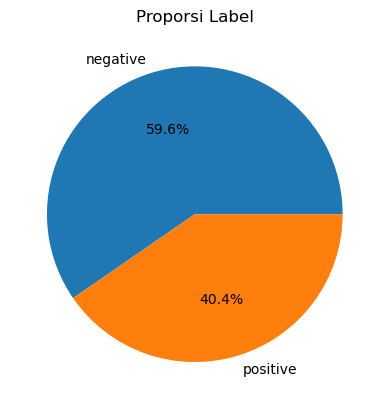

In [36]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
label_counts = df['rate'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Proporsi Label')
plt.show()

object


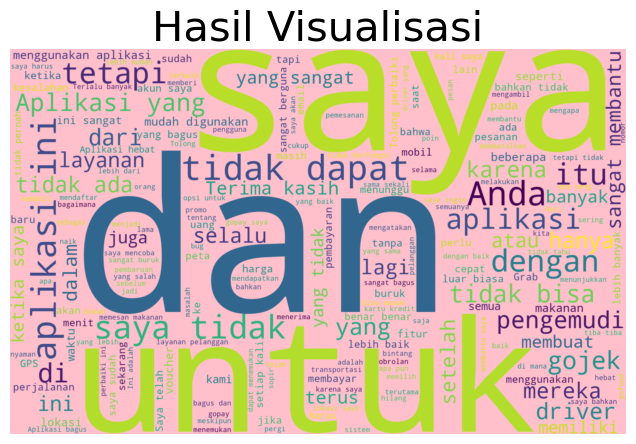

In [54]:
# WordCloud Sentimen Positif
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baca data CSV
df = pd.read_csv('C:/gojek_review_sentiment.csv')

# Cek tipe data kolom 'text'
print(df['review'].dtype)

# Bersihkan data (contoh: hapus baris dengan data bukan string)
df = df[df['review'].apply(lambda x: isinstance(x, str))]

# Gabungkan semua teks
all_text = ' '.join(df['review'])  # Menggunakan spasi sebagai pemisah

# Buat word cloud
wordcloud = WordCloud(width=1600, height=1000, background_color='pink').generate(all_text)

# Tampilkan word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Hasil Visualisasi", size=30)
plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit and transform the text data using CountVectorizer
count_vectors = count_vectorizer.fit_transform(df['review'])

# Get the word frequencies
word_frequencies = count_vectors.sum(axis=0)

# Create a dictionary mapping words to their frequencies
word_freq_dict = dict(zip(count_vectorizer.get_feature_names_out(), word_frequencies))

# Print the word frequencies
for word, freq in word_freq_dict.items():
    print(f'Kata: {word}, Kemunculan: {freq}')

Kata: 00, Kemunculan: [[3 9 1 ... 1 1 1]]


In [78]:
from sklearn.preprocessing import LabelEncoder

# Example: Convert categorical columns to numerical using LabelEncoder
le = LabelEncoder()

# Assuming 'status' and 'review' are the categorical columns in df
df['rate'] = le.fit_transform(df['rate'])

In [80]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('review', axis=1)  # Features (all columns except 'rate')
y = df['rate']               # Target (the 'rate' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the SVM model
clf = svm.SVC()

# Train the model
clf.fit(X_train, y_train)

SVC()

In [84]:
# Accuracy Score
print(f"Akurasi model: {clf.score(X_test, y_test) * 100:.2f}%")

Akurasi model: 100.00%


In [86]:
# Classification Report
from sklearn.metrics import classification_report

pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       149

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



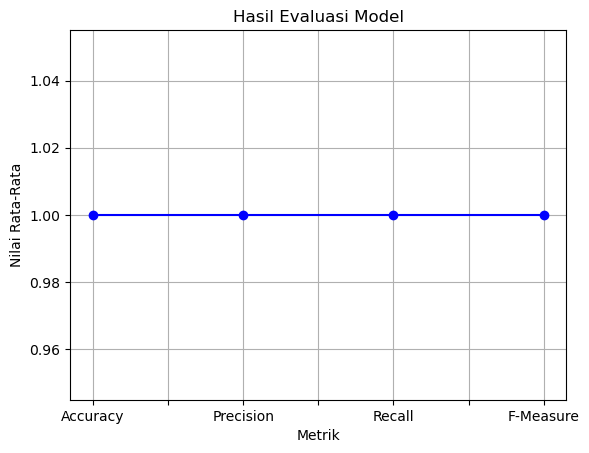

In [88]:
# Data Evaluasi dan Plot Grafik
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(y_test, pred) 
pre_score = precision_score(y_test, pred, average='weighted')
rec_score = recall_score(y_test, pred, average='weighted')
f_score = f1_score(y_test, pred, average='weighted')

# Data evaluasi yang ingin diplot
scores = {
    'Accuracy': acc_score,
    'Precision': pre_score,
    'Recall': rec_score, 
    'F-Measure': f_score
}
# Membuat DataFrame dari data evaluasi
eval_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score']) 

# Plot grafik garis  
eval_df['Score'].plot(kind='line', marker='o', color='blue') 

plt.title('Hasil Evaluasi Model')
plt.xlabel('Metrik') 
plt.ylabel('Nilai Rata-Rata')
plt.grid(True) 

plt.show()